# In this notebook, we will perform Exploratory Data Analysis on the given Data. We will explore and visualize companies' performance, And the relationship between companies' revenue, taxes they pay, etc with other features like State.
# We will also explore how the companies performed against each other, Which state produced the highest revenue etc. 
# We will also compare the performance of companies in top 10 percentile against other smaller companies 90 percentile.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Top 50 US Tech Companies 2022 - 2023.csv')

In [3]:
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

In [5]:
df.describe()

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


In [6]:
corr=df.corr().sort_values('Annual Revenue 2022-2023 (USD in Billions)'
,ascending=False)['Annual Revenue 2022-2023 (USD in Billions)']
corr.to_frame()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_14820\3082084905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().sort_values('Annual Revenue 2022-2023 (USD in Billions)'


,Annual Revenue 2022-2023 (USD in Billions)
Annual Revenue 2022-2023 (USD in Billions),1.000000
Market Cap (USD in Trillions),0.806985
Employee Size,0.795009
Annual Income Tax in 2022-2023 (USD in Billions),0.545949
Founding Year,-0.002965


**As can be seen from the table above, the characteristics of Market Capitalization (Trillion #USD) and the Number of Employees have a strong positive linear relationship with Annual Revenue. Let us plot that relaitionship along with relationship all charecteristiscs with each other using heatMap.** 

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_14820\288865136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

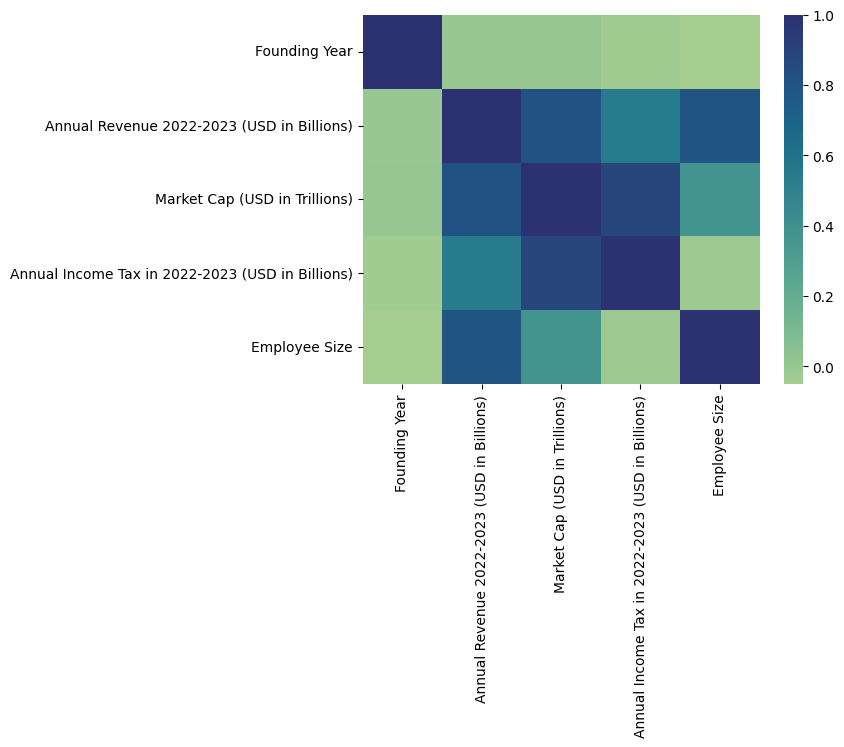

In [7]:
sns.heatmap(df.corr(),cmap="crest")

**The darker the squares in the illustration above, the stronger the relationship with each character. "**

# Next, let's look at how companies in each state perform by looking at the sum of the salaries and average annual salaries of companies based in each state and also income Tax generated by them. 

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_14820\208059742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('HQ State').sum()['Annual Revenue 2022-2023 (USD in Billions)'].plot(kind='barh',


<Axes: ylabel='HQ State'>

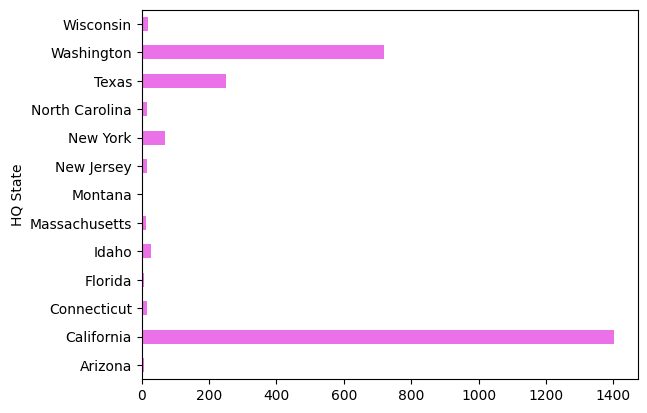

In [27]:
df.groupby('HQ State').sum()['Annual Revenue 2022-2023 (USD in Billions)'].plot(kind='barh',
                                                                                color='#eb71e9')

**Among all the states Companies in California generated most annual revenue.**

**Sometimes total sum does not give the full context of the performance because some states may have fewer or more companies than other states. So let's now examine the average annual revenues of the company in each state.**

In [19]:
states=df.groupby('HQ State').mean()
states

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_14820\2236968847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states=df.groupby('HQ State').mean()


,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
HQ State,,,,,
Arizona,1989.000000,8.050000,0.045000,0.197000,21000.000000
California,1990.272727,42.495152,0.234788,1.495879,38654.090909
Connecticut,1996.000000,17.090000,0.097000,0.865000,20700.000000
Florida,1890.000000,5.610000,0.046000,0.296000,19300.000000
Idaho,1978.000000,27.150000,0.064000,0.888000,49000.000000
Massachusetts,1965.000000,12.570000,0.095000,0.350000,24450.000000
Montana,2012.000000,2.060000,0.046000,0.003000,4991.000000
New Jersey,1949.000000,16.670000,0.090000,0.855000,60000.000000
New York,1960.000000,34.310000,0.075500,-0.270000,179800.000000


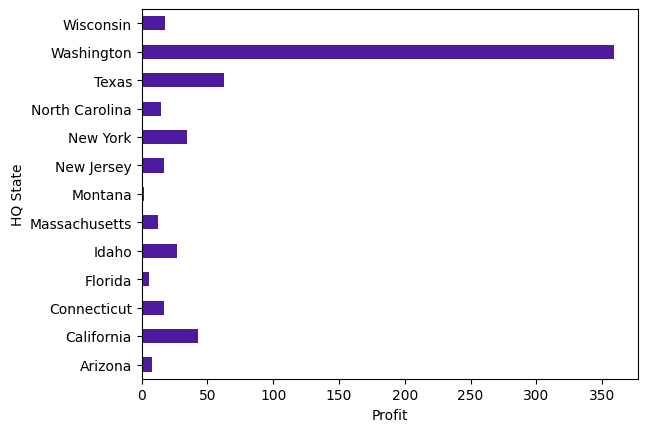

In [14]:
states['Annual Revenue 2022-2023 (USD in Billions)'].plot(kind='barh',color='#4c1a9c')
plt.xlabel('Profit')
plt.show()

**As you can see above, the average annual revenue for companies is highest in Washington state and lowest in Montana.**

**Now we shall compare number of the employee in each state**

<Axes: ylabel='HQ State'>

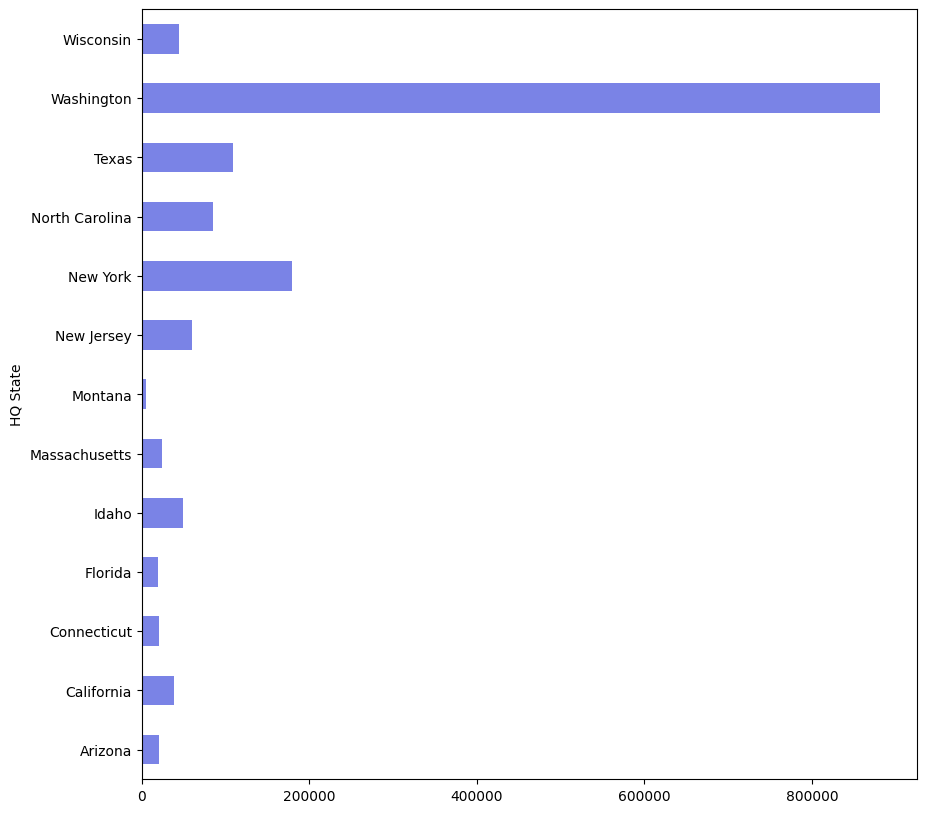

In [52]:
states['Employee Size'].plot(kind='barh',
                             figsize=(10,10),color='#7a83e6')

**Washingon has the highest number of employees**

In [29]:
df['HQ State'].value_counts()

California        33
Texas              4
Washington         2
New York           2
Connecticut        1
Massachusetts      1
New Jersey         1
Wisconsin          1
Idaho              1
Montana            1
Florida            1
Arizona            1
North Carolina     1
Name: HQ State, dtype: int64

# California has the highest number of companies, so let's compare the performance of companies in California. 

In [43]:
df_cal=df.loc[df['HQ State']=='California']
df_cal.set_index('Company Name',inplace=True)

<Axes: ylabel='Company Name'>

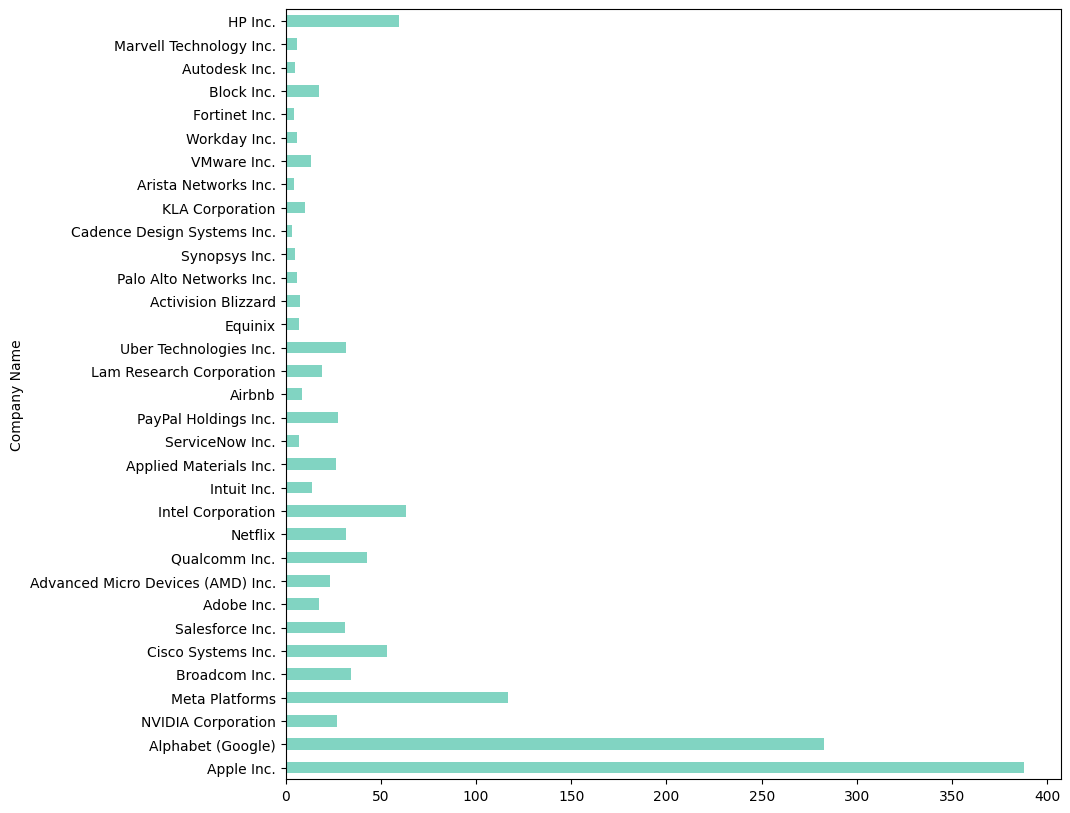

In [50]:
df_cal['Annual Revenue 2022-2023 (USD in Billions)'].plot(
    kind='barh', figsize=(10,10),color='#81d4c2'
)

**Apple had the highest annual revenue among California companies**

**Now we will look at market cap**

<Axes: ylabel='Company Name'>

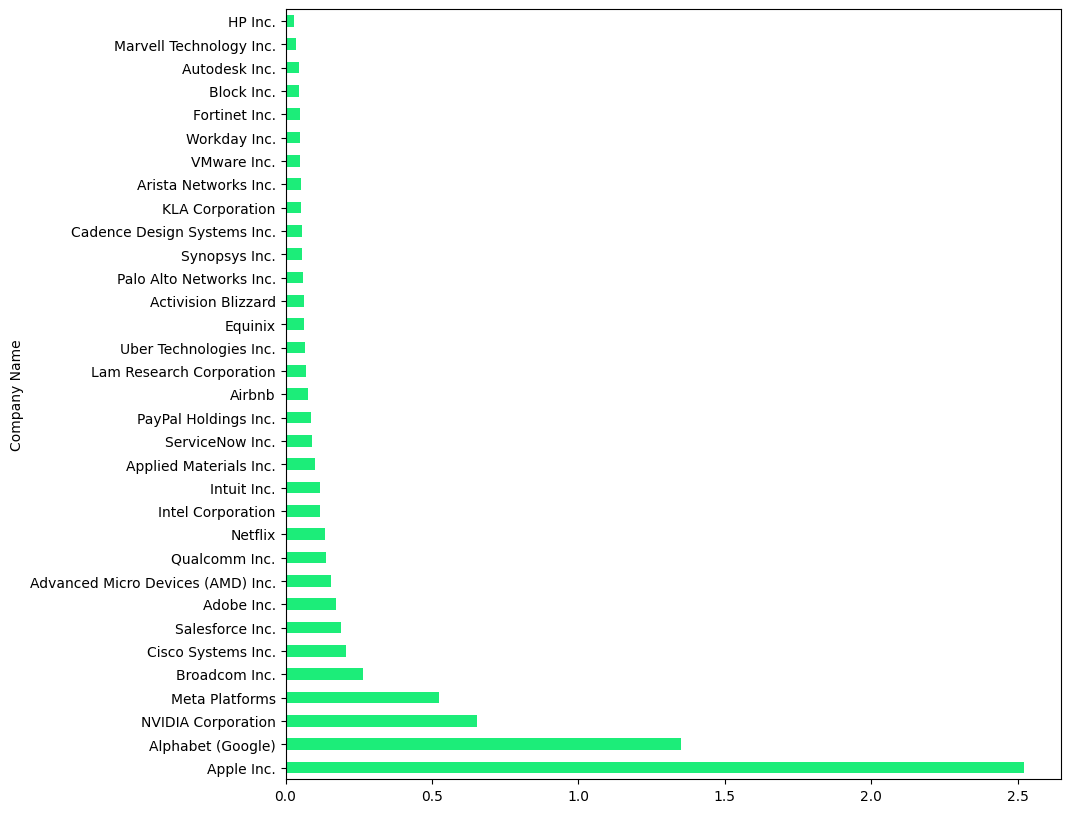

In [49]:
df_cal['Market Cap (USD in Trillions)'].plot(
    kind='barh', figsize=(10,10),color='#1ced79'
)

**Now let's compare employee size**

<Axes: ylabel='Company Name'>

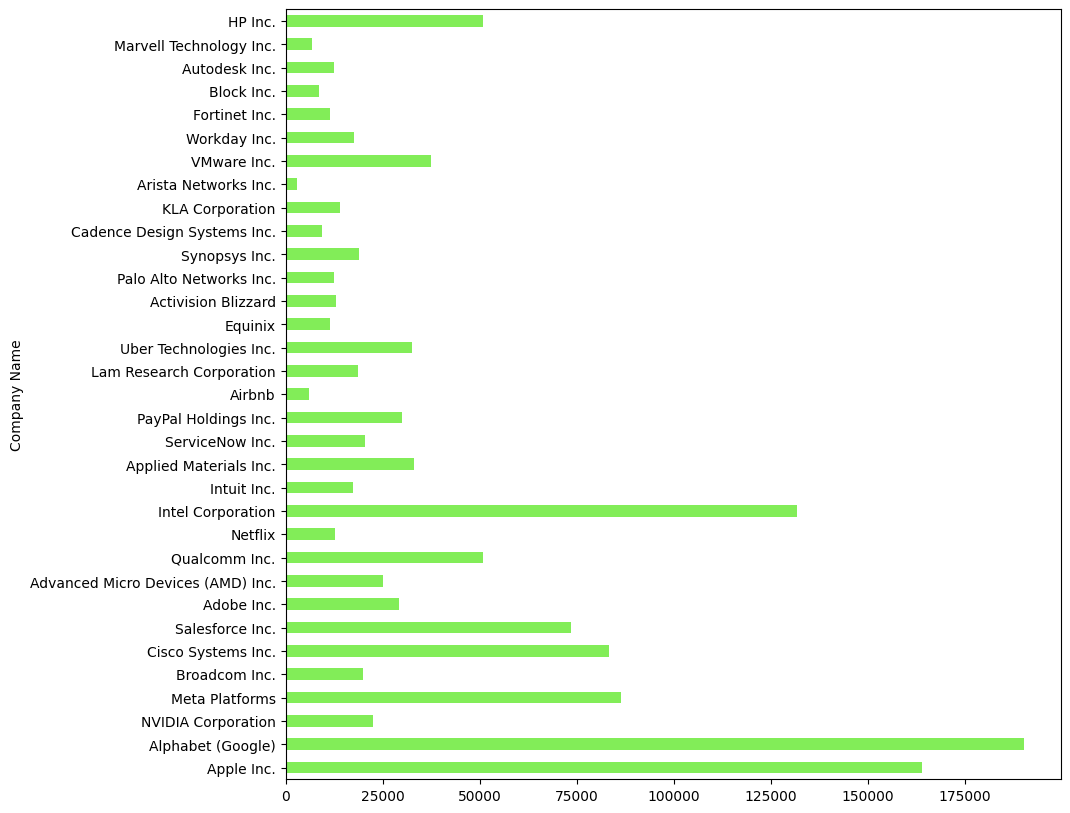

In [51]:
df_cal['Employee Size'].plot(kind='barh',
                             figsize=(10,10), color='#82ed58')

**Google employs the most**

# Now we shall compare top-grossing big companies with other smaller companies

<Axes: >

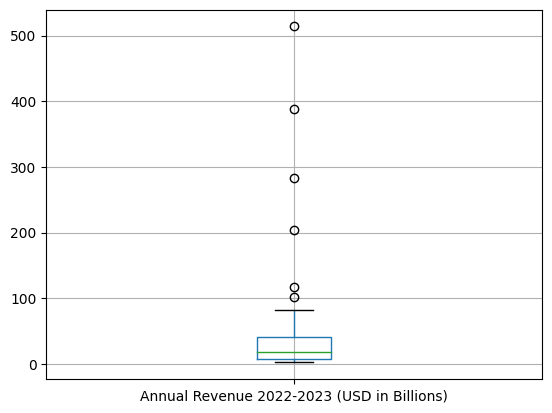

In [54]:
df.boxplot(column=['Annual Revenue 2022-2023 (USD in Billions)'])

In [120]:
dfc=df.copy()

In [121]:
q1=df['Annual Revenue 2022-2023 (USD in Billions)'].quantile(0.90)
q1

103.73000000000002

In [122]:
df.loc[df['Annual Revenue 2022-2023 (USD in Billions)']>q1]

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482


**The above 5 companies listed in the table are in the top 10 percentile by revenue.**

In [123]:
print("The top performing compnies by revenue are:-\n",
      df.loc[df['Annual Revenue 2022-2023 (USD in Billions)']>q1]['Company Name'])

The top performing compnies by revenue are:-
 0               Apple Inc.
1    Microsoft Corporation
2        Alphabet (Google)
3                   Amazon
6           Meta Platforms
Name: Company Name, dtype: object


In [124]:
for i in [dfc]:
    i.loc[i['Annual Revenue 2022-2023 (USD in Billions)']<= q1, 'qgroup']='Small_companies'
    i.loc[i['Annual Revenue 2022-2023 (USD in Billions)']> q1, 'qgroup']='Top_5_companies'

In [125]:
qcompare=dfc.groupby('qgroup').sum()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_14820\1303256289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qcompare=dfc.groupby('qgroup').sum()


In [126]:
qcompare

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
qgroup,,,,,
Small_companies,89260,1055.19,5.147,22.128,1959765
Top_5_companies,9947,1505.03,7.461,47.211,2202716


**Comparing Annual revenue share of the top 5 companies with the rest of the companies**

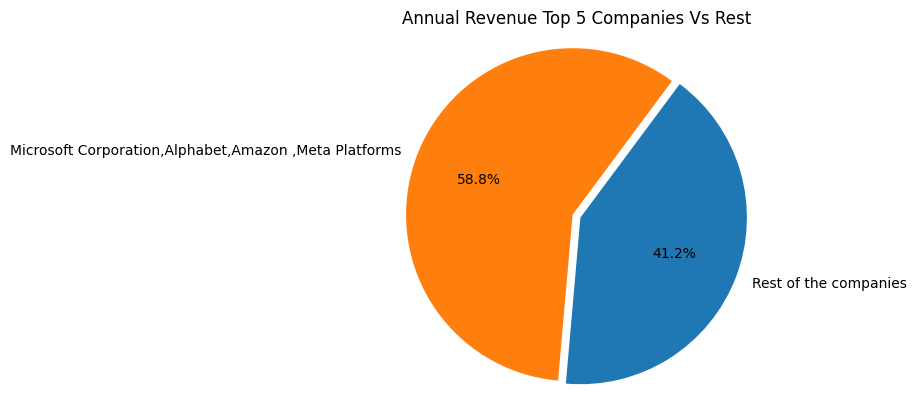

In [136]:
y=qcompare['Annual Revenue 2022-2023 (USD in Billions)']
x=['Rest of the companies','Microsoft Corporation,Alphabet,Amazon ,Meta Platforms']
fig1, ax1 = plt.subplots()
explode = (0, 0.05)
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        startangle=-95,)
ax1.axis('equal')
plt.title('Annual Revenue Top 5 Companies Vs Rest')
plt.show()

**Top 5 companies have 58.8% of share in total annual revenue**

**Comparing Annual income tax share of the top 5 companies with the rest of the companies**

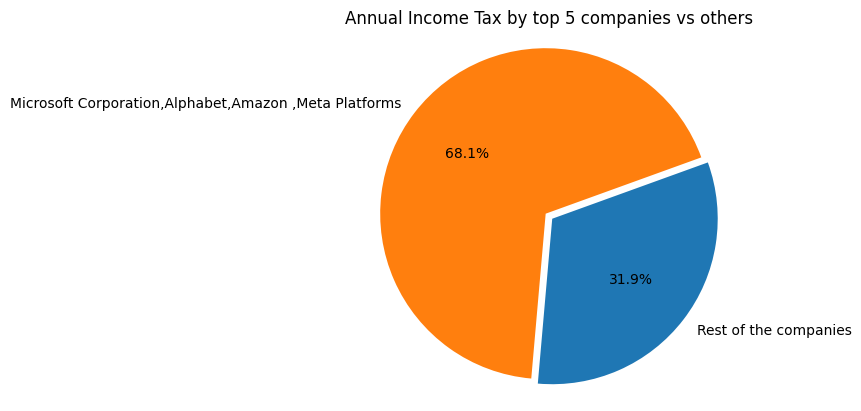

In [137]:
y=qcompare['Annual Income Tax in 2022-2023 (USD in Billions)']
x=['Rest of the companies','Microsoft Corporation,Alphabet,Amazon ,Meta Platforms']
fig1, ax2 = plt.subplots()
explode = (0, 0.05)
ax2.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        startangle=-95,)
ax2.axis('equal')
plt.title('Annual Income Tax by top 5 companies vs others')
plt.show()

**Top 5 companies have 68.1% of share in total income tax**

In [ ]:
y=qcompare['Annual Income Tax in 2022-2023 (USD in Billions)']
x=['Rest of the companies','Microsoft Corporation,Alphabet,Amazon ,Meta Platforms']
fig1, ax2 = plt.subplots()
explode = (0, 0.05)
ax2.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        startangle=-95,)
ax2.axis('equal')
plt.title('Annual Income Tax by top 5 companies vs others')
plt.show()

**Comparing employee numbers of the top 5 companies with the rest of the companies**

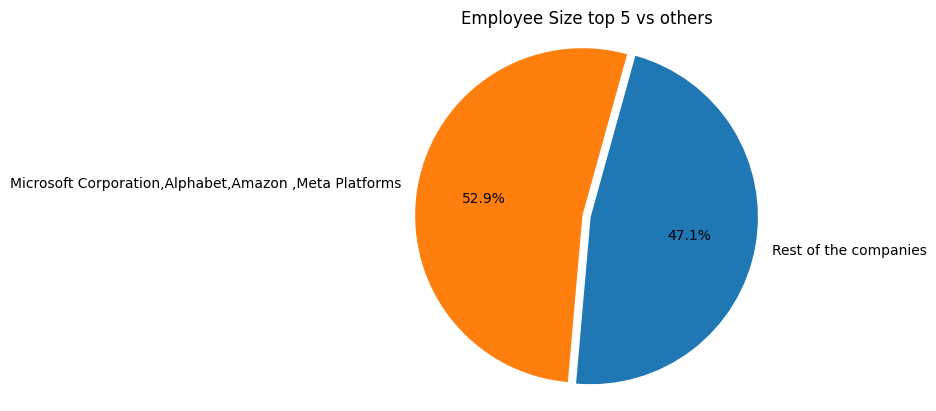

In [138]:
y=qcompare['Employee Size']
x=['Rest of the companies','Microsoft Corporation,Alphabet,Amazon ,Meta Platforms']
fig1, ax2 = plt.subplots()
explode = (0, 0.05)
ax2.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        startangle=-95,)
ax2.axis('equal')
plt.title('Employee Size top 5 vs others')
plt.show()

**Top 5 comapnies employ 52.9% of the employees**